# Import Required Libraries

In [1]:
import cv2
print(f"OpenCV Version : ",cv2.__version__)

import os
import matplotlib.pyplot as plt
import numpy as np

image_folder_path=<ENTER FOLDER PATH>
file_name=<ENTER FILE NAME>

OpenCV Version :  4.7.0


# Visualzing Basics

OpenCV utlizes BGR (Blue-Green-Red) image reading comapred to standard approach of RGB. Hence to view these images BGRtoRGB convertion has to be used

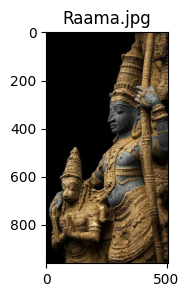

In [14]:
def cv2_imshow(folder, file_name, size=10):
  root=os.path.join(folder,file_name)
  image=cv2.imread(root)

  aspect_ratio=image.shape[0]/image.shape[1]
  plt.figure(figsize=(size+aspect_ratio,size))

  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(file_name)
  plt.show()

  return image

def imgshow(image, title=None, size=5):
  aspect_ratio=image.shape[0]/image.shape[1]
  plt.figure(figsize=(size+aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

image=cv2_imshow(image_folder_path, file_name, size=3)

## Spliting image array to 🔵Blue, 🟢Green, 🔴Red

In [ ]:
zeros = np.zeros(image.shape[:2], dtype="uint8")
B, G ,R=cv2.split(image)
imgshow(cv2.merge([B, G, R]), size=5)

## HSV (Hue-Saturation-value)
▶ **Hue** : Represents the spectrum of colors  
▶ **Saturation** : Represents the Vibrance and the strength of the colors  
▶ **Value** : Brightness of the image  

In [ ]:
hsv_image=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imgshow(hsv_image[:, :, 0], title="Hue")
imgshow(hsv_image[:, :, 1], title="Saturation")
imgshow(hsv_image[:, :, 2], title="Value")

# Masking Images

In [ ]:
blank_image=np.zeros((512,512,3), np.uint8) 
line_image=cv2.line(blank_image, (0,0), (511, 511), (55, 15, 255),5)
imgshow(line_image, size=3)

In [ ]:
blank_image=np.zeros((512,512,3), np.uint8) 
box_image=cv2.rectangle(blank_image, (100,100), (300, 300), (55, 15, 255),5)
imgshow(box_image, size=3)

In [ ]:
blank_image=np.zeros((512,512,3), np.uint8) 
circle_image=cv2.circle(blank_image, [350, 350], 100, (55, 15, 255),5)
imgshow(circle_image, size=3)

In [ ]:
blank_image=np.zeros((512,512,3), np.uint8) 
plts=np.array([[10,10],[130,120],[210,369], [210,511]], np.int32)
plts=plts.reshape(-1,1,2)
poly_image=cv2.polylines(blank_image, [plts], True, (55, 15, 255), 5)
imgshow(poly_image, size=3)

In [ ]:
blank_image=np.zeros((512,512,3), np.uint8)
text="Hello World!"
text_image=cv2.putText(blank_image, text, (35, 290), cv2.FONT_HERSHEY_COMPLEX, 2, (55, 15, 255),5)
imgshow(text_image, size=3)

# Rotation and Transpose

In [ ]:
h,w=image.shape[:2]

In [ ]:
T=np.float32([[1,0,w/4], [0,1,h/4]])
img_translation=cv2.warpAffine(image, T, (w,h))
imgshow(img_translation, size=5)

In [ ]:
T=np.float32([[1,0,w/4], [0,1,h/4]])
img_translation=cv2.warpAffine(image, T, (w,h))
imgshow(img_translation, size=5)

In [ ]:
img_transpose=cv2.transpose(image)
imgshow(img_transpose, size=5)

In [ ]:
img_flip=cv2.flip(image, 1)
imgshow(img_flip, size=5)

#Scaling

## Non-Pyramid Approach

In [ ]:
linear_scaling=cv2.resize(image, None, fx=0.5, fy=0.5)
imgshow(linear_scaling)

area_scaling=cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
imgshow(area_scaling)

cube_scaling=cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
imgshow(cube_scaling)

nearest_scaling=cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
imgshow(nearest_scaling)

## Pyramid Approach

In [ ]:
imgshow(cv2.pyrDown(image))
imgshow(cv2.pyrUp (image))

# Cropping Image

In [ ]:
start_row=100
end_row=300
start_col=100
end_col=300

cropped_image=image[start_row:end_row, start_col:end_col]
imgshow(cropped_image, size=5)

# Artimetic Operations

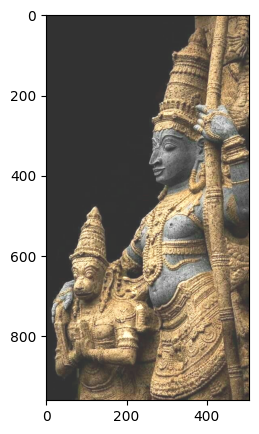

In [15]:
append_array=np.ones(image.shape, np.uint8)*50
imgshow(cv2.add(image, append_array))

# Bitwise Operations

1. AND - Obtain only the overlaps of the images
2. OR - Obtain the overlaps and the non-intersection
3. NOT - Not belonging to the image

🔑**Note** : These operations can be used for manupulation similar to image editing softwares (Ex: Photoshop, Inkscape)

In [ ]:
image1=np.zeros((512,512,3), np.uint8) 
circle_image=cv2.circle(image1, [200, 200], 150, (255, 255, 255),-1)
imgshow(circle_image)

image2=np.zeros((512,512,3), np.uint8) 
box_image=cv2.rectangle(image2, (100,100), (400, 400), (255, 255, 255),-1)
imgshow(box_image)

bit_and_image=cv2.bitwise_and(circle_image, box_image)
imgshow(bit_and_image)

# Convlutional Blurring

🔑**Note** : Greater the kernel size denser the blurring

In [ ]:
kernel=np.ones((10,10), np.float32)/100
blurred_image=cv2.filter2D(image, -1, kernel)
imgshow(blurred_image)

# Built in Blurring

In [ ]:
avg_blur=cv2.blur(image, (5,5))
imgshow(avg_blur)

gaussian_blur=cv2.GaussianBlur(image, (5,5), 0)
imgshow(gaussian_blur)

median_blur=cv2.medianBlur(image, 5)
imgshow(median_blur)

# Sharpening

In [ ]:
kernel=np.array([[-1,-1,-1],
                 [-1,9,-1],
                 [-1,-1,-1]])
blurred_image=cv2.filter2D(image, -1, kernel)
imgshow(blurred_image)

# Text Recognization from Images

## Thresholding

To recognize texts, threading operations can be use to augment the data for better results. Given a lower linit and upper limit, if the pixel value is less than the lower limit it is recognized as white else as black.

🔑 **Note:**
Blurring the image before thresolding is prefered to remove noise from the image and get a clearer view.

1. **Basic Thresholding** :  
Follows the above definition. Following are the algorithms:
<ul>
  <li>THRESH_BINARY
  <li>THRESH_BINARY_INV
  <li>THRESH_TRUNC
  <li>THRESH_TOZERO
  <li>THRESH_TOZERO_INV
</ul>

2. **Adaptive Thresholding** :  
Adaptive algorithm finds the limits mathematically. Max value is the only required parameter apart from the array and algorithm.
<ul>
  <li>ADAPTIVE_THRESH_MEAN_C
  <li>ADAPTIVE_THRESH_GAUSSIAN_C
</ul>

In [ ]:
#Read Text image
root=<ENTER THE PATH TO THE FILE>
gray=cv2.imread(root)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

In [ ]:
#Basic Thresholding
_t, basic_th_image=cv2.threshold(gray, 170, 200, cv2.THRESH_BINARY)
imgshow(basic_th_image)

In [ ]:
#Adaptive Thresholding
adpt_th_image=cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
imgshow(adpt_th_image)

#Otsu Thresholding
blur = cv2.GaussianBlur(gray,(5,5),0)
_t, otsu_th_image = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imgshow(otsu_th_image)

## Erosion and Dilation

Erosion - Removes pixel arnd boundry  
Dilation - Adds pixel arnd boundry

Opening - Performs Erosion then Dilation  
Closing - Performs Dilation then Erosion

In [ ]:
# Define Kernel
kernel_size = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

#Erosion
eroded_img = cv2.erode(gray, kernel, iterations=1)
imgshow(eroded_img)

#Dilation
dilated_img = cv2.dilate(gray, kernel, iterations=1)
imgshow(dilated_img)

In [ ]:
#Opening
opened_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
imgshow(opened_img)

#Closing
closed_img = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
imgshow(closed_img)